In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets

In [3]:
from recipes.knn import KNNClassifier
from recipes.cross_validation import cross_validate

In [4]:
iris = datasets.load_iris()

In [5]:
df=pd.DataFrame(iris.data)
df['class']=iris.target

In [6]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [7]:
df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
X = df.loc[:, df.columns != 'class']
y = df['class']

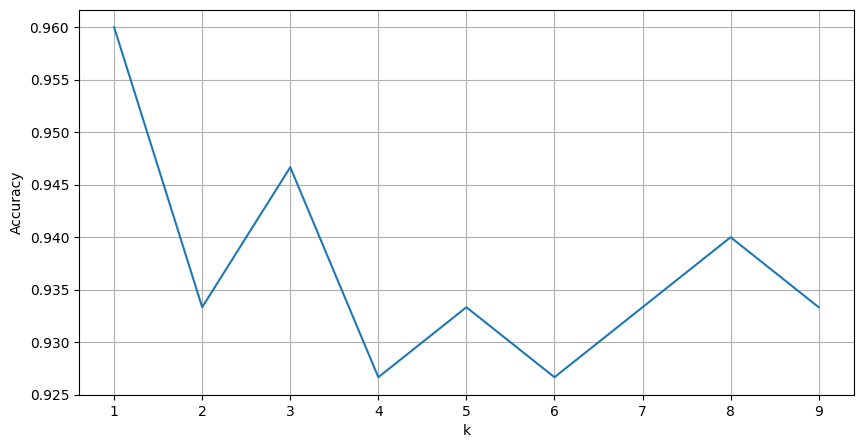

In [9]:
scores = {}

for k in range(1, 10):
    classifier = KNNClassifier(k=k)
    scores[k] = cross_validate(X, y, classifier)[1]

plt.figure(figsize=(10,5))
plt.xticks(np.arange(1, 10, 1), minor=True)
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(list(scores.keys()), list(scores.values()))
plt.show()